In [46]:
# comparing surface files

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [61]:
# describe a few functions:

def get_surfacedata_file(site):
    path_root = '/mnt/inputdata/E3SM/lnd/clm2/surfdata_map/'
    surface_files = {
        "kougarok": path_root + "surfdata_1x1pt_kougarok-GRID_simyr1850_c360x720_c171002.nc",
        "teller": path_root + "surfdata_1x1pt_teller-GRID_simyr1850_c360x720_c171002.nc",
        "council": path_root + "surfdata_1x1pt_council-GRID_simyr1850_c360x720_c171002.nc",
        "beo": path_root + "surfdata_1x1pt_beo-GRID_simyr1850_c360x720_c171002.nc",
        "trail_valley_creek": path_root + "surfdata_1x1pt_TrailValleyCreek-GRID_simyr1850_c360x720_c250306.nc",
        "abisko": path_root + "surfdata_1x1pt_Abisko-GRID_simyr1850_c360x720_c250306.nc",
        "bayelva": path_root + "surfdata_1x1pt_SJ-BlvBayelva-GRID_simyr1850_c360x720_c250306.nc",
        "samoylov_island": path_root + "surfdata_1x1pt_SamoylovIsland-GRID_simyr1850_c360x720_c250306.nc",
        "imnaviat_creek": path_root + "surfdata_1x1pt_ImnaviatCreek-GRID_simyr1850_c360x720_c250609.nc",
        "upper_kuparuk": path_root + "surfdata_1x1pt_UpperKuparuk-GRID_simyr1850_c360x720_c250609.nc",
    }

    try:
        return surface_files[site]
    except KeyError:
        raise ValueError(f"Unknown site: {site}")


def plot_pft_distribution(pft_array):

    # -----------------------------
    # PFT labels
    # -----------------------------
    labels = [
        "bare ground",   # 0
        "needleleaf evergreen temperate tree",   # 1
        "needleleaf evergreen boreal tree",   # 2
        "needleleaf deciduous boreal tree",   # 3
        "broadleaf evergreen tropical tree",   # 4
        "broadleaf evergreen temperate tree",   # 5
        "broadleaf deciduous tropical tree",   # 6
        "broadleaf deciduous temperate tree",   # 7
        "broadleaf deciduous boreal tree",   # 8
        "broadleaf evergreen shrub",   # 9
        "broadleaf deciduous temperate shrub",  # 10
        "broadleaf deciduous boreal shrub",  # 11
        "c3 arctic grass",  # 12
        "c3 non-arctic grass",  # 13
        "c4 grass",  # 14
        "c3 crop",  # 15
        "c3 irrigated",  # 16
    ]

    v = np.array(pft_array).reshape(-1)

    # -----------------------------
    # Plot (single stacked bar)
    # -----------------------------
    fig, ax = plt.subplots(figsize=(7.5, 2.2))

    left = 0.0
    height = 0.7  # thicker bar
    for val, label in zip(v, labels):
        if val == 0:
            continue
        ax.barh(0, val, left=left, height=height, label=label)
        if val >= 5:
            ax.text(left + val/2, 0, f"{val:.0f}%", va="center", ha="center", fontsize=10)
        left += val
    
    ax.set_xlim(0, 100)
    ax.set_yticks([])
    ax.set_xlabel("Area fraction (%)")
    ax.set_title("PFT area fraction")
    
    ax.legend(
        title="Category",
        bbox_to_anchor=(0.5, -0.35),
        loc="upper center",
        ncol=2,
        frameon=False
    )
    
    plt.tight_layout()
    plt.show()

def as_scalar(da):
    # da can be xarray DataArray or numpy scalar
    return float(np.asarray(da).mean())
    
def plot_landunit_distribution(srf_data):

    # -----------------------------
    # landunit labels
    # -----------------------------
    labels = [
        "% crop",
        "% glacier",
        "% lake",
        "% natural vegetation",
        "% urban",
        "% wetland"
    ]

    v = np.array([
            as_scalar(srf_data.PCT_CROP),
            as_scalar(srf_data.PCT_GLACIER),
            as_scalar(srf_data.PCT_LAKE),
            as_scalar(srf_data.PCT_NATVEG),
            as_scalar(srf_data.PCT_URBAN),   # no np.sum([...]) needed
            as_scalar(srf_data.PCT_WETLAND),
            ], dtype=float).reshape(-1)

    # -----------------------------
    # Plot (single stacked bar)
    # -----------------------------
    fig, ax = plt.subplots(figsize=(6, 4))
    
    left = 0.0
    for i, (val, label) in enumerate(zip(v, labels)):
        if val == 0:
            continue  # skip zero-area entries
        ax.barh([0], [val], left=left, label=label)
        ax.text(
            left + val / 2,
            0,
            f"{int(val)}%",
            va="center",
            ha="center",
            fontsize=9
        )
        left += val
    
    ax.set_xlim(0, 100)
    ax.set_yticks([])
    ax.set_xlabel("Area fraction (%)")
    ax.set_title("Land unit area fraction")
    
    ax.legend(
        title="Category",
        ncol=min(6, len(ax.get_legend_handles_labels()[1])),
        bbox_to_anchor=(0.5, -0.35),
        loc="upper center"
    )
    
    plt.tight_layout()
    plt.show()

In [62]:
# get surface data file
fname = get_surfacedata_file("abisko")
data = xr.open_dataset(fname)

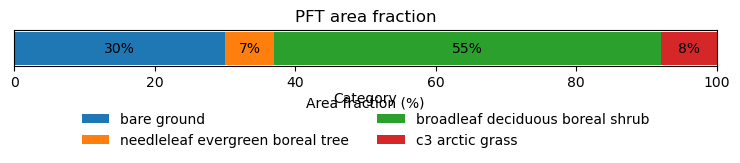

In [63]:
plot_pft_distribution(data.PCT_NAT_PFT)

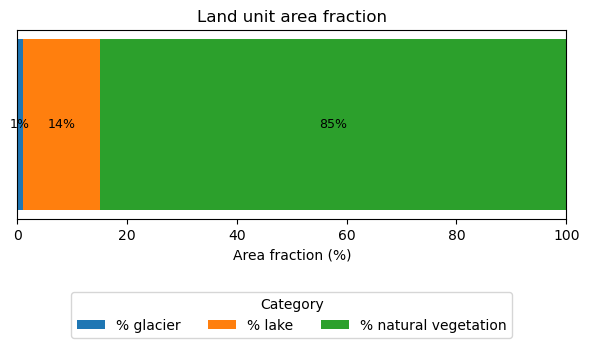

In [58]:
plot_landunit_distribution(data)